In [68]:
import pandas as pd
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
import keras
from keras import optimizers
from keras.models import load_model
from keras.utils import np_utils

In [3]:
import sys 
import os
sys.path.append(os.path.abspath("./models/"))

In [4]:
d_train = pd.read_csv('data/train.csv')

In [5]:
pixels = d_train.columns.drop('label')
y_column = 'label'

In [18]:
d_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


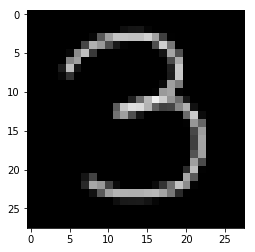

In [59]:
f = plt.imread('img/3.png')
plt.imshow(f)
plt.show()

In [64]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [65]:
f = rgb2gray(f)

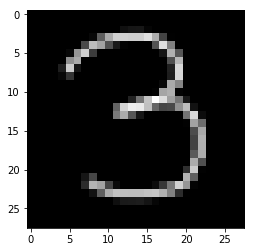

In [73]:
img = mpimg.imread('img/3.png')     
gray = rgb2gray(img).dot(255)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [55]:
rand_img = d_train[pixels].iloc[[3]].as_matrix()
rand_img = rand_img.reshape(28, 28)
rand_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 220, 179,   6,   0,   0,   0,   0,
          0,   0,   0,   0,   9,  77,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

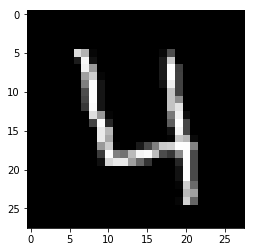

In [74]:
plt.imshow(rand_img, cmap = plt.get_cmap('gray'))
plt.show()

In [75]:
model = load_model('models/model-cnn2-e10-fitted.h5')

In [78]:
pred = model.predict(gray.reshape(1, 28, 28, 1))
pred

array([[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)